In [1]:
# importing the necessary library
import numpy as np
import pandas as pd

In [2]:
# load the housing dataset
housing=pd.read_csv("housing.csv")
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
housing.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [5]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


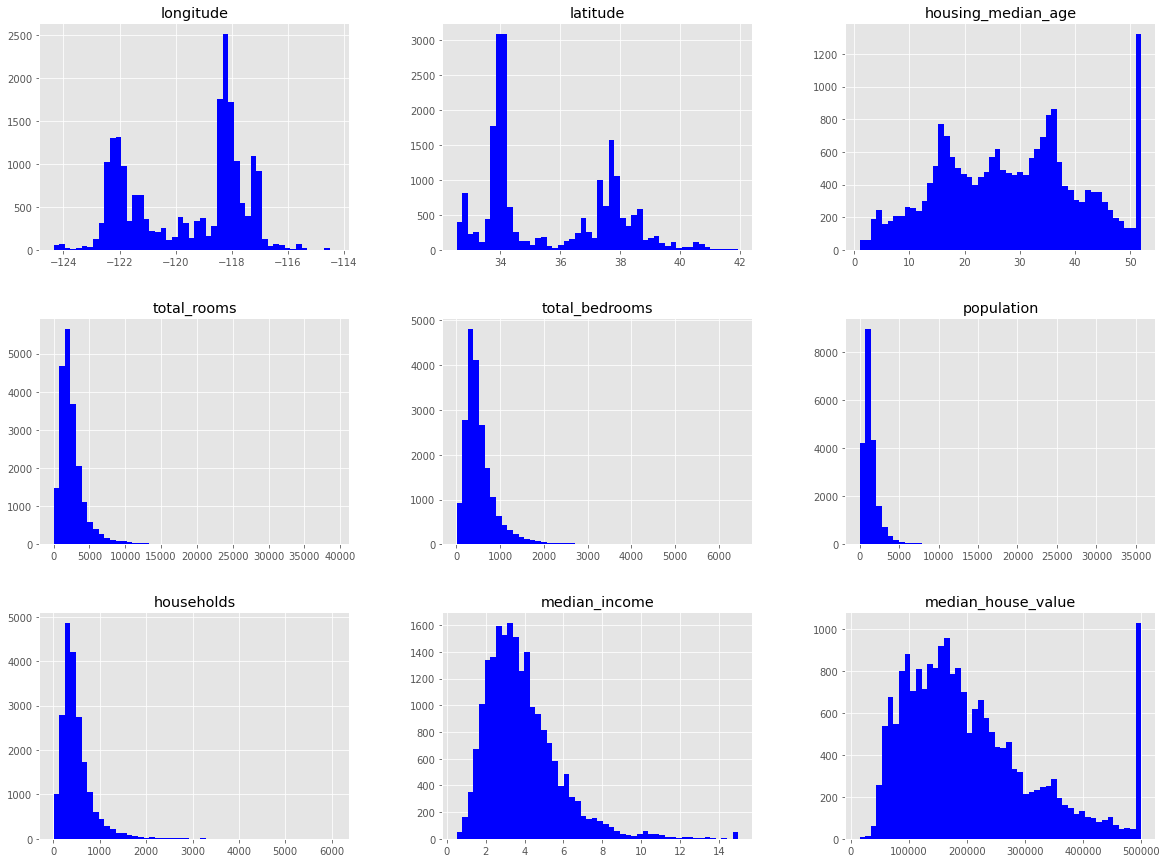

In [14]:
%matplotlib inline 
import matplotlib.pyplot as plt
plt.style.use("ggplot")
housing.hist(bins=50, figsize=(20,15),color="b")
plt.show()


In [19]:
# fuction for the split train,test data
def split_train_test(data,test_ratio):
    shuffled_indices=np.random.permutation(len(data))
    test_set_size= int(len(data)*test_ratio)
    test_indices=shuffled_indices[:test_set_size]
    train_indices=shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]
# this function will always generate different train and test set
# we can fix this using np.random.seed(42) or save the first generated set
# but both the solution will break next time you fetch the updated solution

In [20]:
train_set, test_set=split_train_test(housing,0.2)
len(train_set), len(test_set)

(16512, 4128)

In [22]:
from zlib import crc32

def test_set_check(identifier,test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32
def split_train_test_by_id(data,test_ratio, id_column):
    ids=data[id_column]
    in_test_set = ids.apply(lambda id_:test_set_check(id_,test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [23]:
# the housing the dataset does not have and identifier column
housing_with_id=housing.reset_index()
train_set , test_set= split_train_test_by_id(housing_with_id,0.2,"index")

In [26]:
train_set.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
6,6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY


In [27]:
housing_with_id["id"]=housing["longitude"]*1000 +housing["latitude"]
train_set,test_set=split_train_test_by_id(housing_with_id,0.2,"id")

In [28]:
train_set.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,-122192.12
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,-122182.14
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,-122202.15
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,-122212.15
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,-122212.15


In [29]:
# using the scikit-learn to split the data
from sklearn.model_selection import train_test_split
train_set,test_set = train_test_split(housing,test_size=0.2,random_state=42)

<AxesSubplot:>

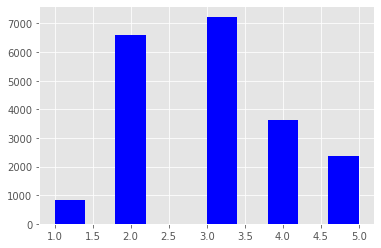

In [31]:
housing["income_cat"]=pd.cut(housing["median_income"],
                            bins=[0.,1.5,3.0,4.5,6.,np.inf],
                            labels=[1,2,3,4,5])
housing.income_cat.hist(color='b')

In [33]:
# stratified sampling based on the income category
from sklearn.model_selection import StratifiedShuffleSplit

split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(housing,housing["income_cat"]):
    strat_train_set=housing.loc[train_index]
    strat_test_set=housing.loc[test_index]

In [34]:
strat_test_set["income_cat"].value_counts()/len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [35]:
# you should remove the income_cat attribute so the data is back to its original state
for set_ in (strat_train_set,strat_test_set):
    set_.drop("income_cat",axis=1,inplace=True)

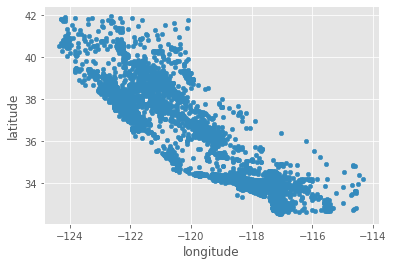

In [38]:
# lets create a copy so you can play with it without harming the training set
housing=strat_train_set.copy()
housing.plot(kind="scatter", x= "longitude",y="latitude")
plt.show()

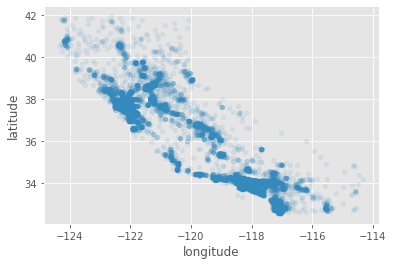

In [40]:
# setting the alpha =0.1 makes it much easier to visualize the place where there is high desity
housing.plot(kind="scatter", x="longitude",y="latitude",alpha=0.1)
plt.show()

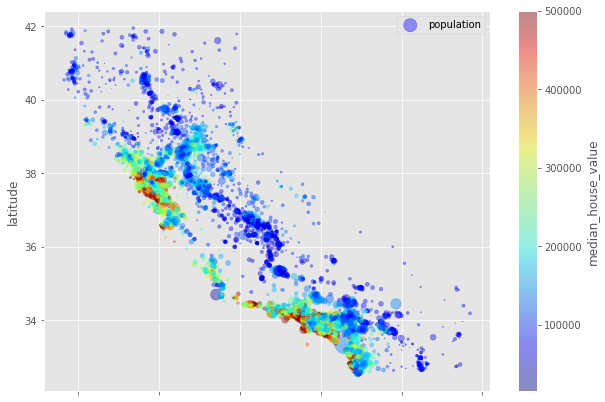

In [42]:
housing.plot(kind="scatter", x="longitude",y="latitude",alpha=0.4,
            s=housing["population"]/100 , label="population",figsize=(10,7),
            c="median_house_value",cmap=plt.get_cmap("jet"),colorbar=True)
plt.legend()

In [44]:
# since the dataset is not too large, compute the standart correlation cofficient(Pearson's r)
corr_matrix=housing.corr()
corr_matrix.median_house_value.sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

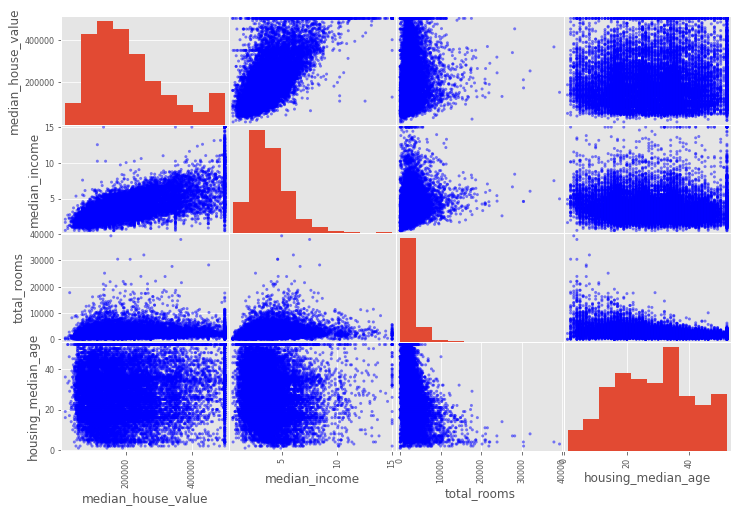

In [48]:
from pandas.plotting import scatter_matrix
attributes= ["median_house_value","median_income","total_rooms","housing_median_age"]
scatter_matrix(housing[attributes],figsize=(12,8),color="b")
plt.show()

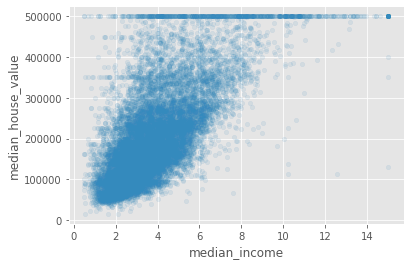

In [52]:
# the most promissing attribute to predict the median house value is median income
housing.plot(kind="scatter",x="median_income",y="median_house_value",alpha=0.1)
plt.show()

In [55]:
# experimenting witha attribute combination
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"]=housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_house"]=housing["population"]/housing["households"]
corr_matrix=housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)


median_house_value      1.000000
median_income           0.687151
rooms_per_household     0.146255
total_rooms             0.135140
housing_median_age      0.114146
households              0.064590
total_bedrooms          0.047781
population_per_house   -0.021991
population             -0.026882
longitude              -0.047466
latitude               -0.142673
bedrooms_per_room      -0.259952
Name: median_house_value, dtype: float64

In [56]:
# prepare the data for machine learning algorithms
# drop() creates a copy of the data and does not affect the original df
housing=strat_train_set.drop("median_house_value",axis=1)
housing_lables=strat_train_set["median_house_value"].copy()

In [104]:
housing_labels=strat_train_set["median_house_value"].copy()

In [57]:
# data cleaning
# most machine learning algorithms cannot work with missing features
# housing.dropna(subset=["total_bedrooms"]) # option 1
# housing.drop("total_bedrooms", axis=1) # option 2
# median=housing["total_bedrooms"].median()
# housing["total_bedrooms"].fillna(median,inplace=True) # option 3

In [60]:
# scikit-learn provides a handy class to take care of missing value
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
# since the median can be only computed on numerial value
housing_num = housing.drop("ocean_proximity", axis=1)
imputer.fit(housing_num)
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [61]:
housing_num.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [63]:
# you can use this "trained" imputer to transform the training set by replacing missing value 
# by leaned median
X=imputer.transform(housing_num)
# the result is plain numpy array containing the transformed features
housing_tr= pd.DataFrame(X,columns=housing_num.columns)

In [65]:
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.0 MB


In [80]:
# handling text and categorical Attributes
housing_cat=housing["ocean_proximity"]
housing_cat.head(10)


12655        INLAND
15502    NEAR OCEAN
2908         INLAND
14053    NEAR OCEAN
20496     <1H OCEAN
1481       NEAR BAY
18125     <1H OCEAN
5830      <1H OCEAN
17989     <1H OCEAN
4861      <1H OCEAN
Name: ocean_proximity, dtype: object

In [81]:
housing_2D = np.array(housing_cat).reshape(-1,1)
housing_2D

array([['INLAND'],
       ['NEAR OCEAN'],
       ['INLAND'],
       ...,
       ['<1H OCEAN'],
       ['<1H OCEAN'],
       ['INLAND']], dtype=object)

In [82]:
# converting categories from text to numbers
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder=OrdinalEncoder()
housing_cat_encoded=ordinal_encoder.fit_transform(housing_2D)
housing_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [83]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [85]:
# using onehot encoding to convert the categorical value to numerical
from sklearn.preprocessing import OneHotEncoder
cat_encoder=OneHotEncoder()
housing_cat_1hot=cat_encoder.fit_transform(housing_2D)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [86]:
# convert sparse matrix to 2d array
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [87]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [89]:
# custom transformer
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, households_ix = 3,4,5,6
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self,add_bedrooms_per_room=True): # no*args or **kwargs
        self.add_bedrooms_per_room=add_bedrooms_per_room
    def fit(self,X,y=None):
        return self # nothing else to do
    def transform(self,X,y=None):
        rooms_per_household=X[:,rooms_ix]/X[:,households_ix]
        population_per_household=X[:,population_ix]/X[:,households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room=X[:,bedrooms_ix]/X[:,rooms_ix]
            return np.c_[X,rooms_per_household,population_per_household,
                        bedrooms_per_room]
        else:
            return np.c_[X,rooms_per_household,population_per_household]
    
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs=attr_adder.transform(housing.values)
    

In [90]:
housing_extra_attribs

array([[-121.46, 38.52, 29.0, ..., 'INLAND', 5.485835694050992,
        3.168555240793201],
       [-117.23, 33.09, 7.0, ..., 'NEAR OCEAN', 6.927083333333333,
        2.6236979166666665],
       [-119.04, 35.37, 44.0, ..., 'INLAND', 5.3933333333333335,
        2.223333333333333],
       ...,
       [-122.72, 38.44, 48.0, ..., '<1H OCEAN', 4.1104651162790695,
        2.6627906976744184],
       [-122.7, 38.31, 14.0, ..., '<1H OCEAN', 6.297405189620759,
        2.411177644710579],
       [-122.14, 39.97, 27.0, ..., 'INLAND', 5.477157360406092,
        3.1725888324873095]], dtype=object)

In [93]:
# transformation pipelines
# small pipeline for the numerical attributes
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline=Pipeline([
    ('inputer', SimpleImputer(strategy='median')),
    ('attribs_adder',CombinedAttributesAdder()),
    ('std_scaler',StandardScaler())
])
housing_num_tr=num_pipeline.fit_transform(housing_num)

In [100]:
from sklearn.compose import ColumnTransformer
num_attribs=list(housing_num)
cat_attribs=["ocean_proximity"]
full_pipeline=ColumnTransformer([
    ('num',num_pipeline,num_attribs),
    ('cat',OneHotEncoder(),cat_attribs)
])
housing_prepared=full_pipeline.fit_transform(housing)

In [102]:
housing_prepared.shape

(16512, 16)

In [107]:
# select and Train a Model
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(housing_prepared,housing_labels)
some_data=housing.iloc[:5]
some_labels=housing_labels.iloc[:5]
some_data_prepared=full_pipeline.transform(some_data)
print("Predictions: ",lin_reg.predict(some_data_prepared))
print("Labels: ",list(some_labels))

Predictions:  [ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089]
Labels:  [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [110]:
# lets measure this regression model's RMSE on the whole training set
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse=mean_squared_error(housing_lables,housing_predictions)
lin_rmse=np.sqrt(lin_mse)
lin_rmse

68627.87390018745

In [120]:
'''most district median_housing_value range betwen $120000 and $265000 , so a typical prediciton error of %68627 is not very satisfying.This is an example of model underfitting the training data'''

'most district median_housing_value range betwen $120000 and $265000 , so a typical prediciton error of %68627 is not very satisfying.This is an example of model underfitting the training data'

In [112]:
# lets try a more complex model to see how it does
from sklearn.tree import DecisionTreeRegressor

tree_reg=DecisionTreeRegressor()
tree_reg.fit(housing_prepared,housing_labels)

housing_predictions=tree_reg.predict(housing_prepared)
tree_mse=mean_squared_error(housing_labels,housing_predictions)
tree_rmse=np.sqrt(tree_mse)
tree_rmse

0.0

In [116]:
# using the cross validation method
from sklearn.model_selection import cross_val_score
score=cross_val_score(tree_reg,housing_prepared,housing_labels,
                     scoring="neg_mean_squared_error",cv=10)
tree_rmse_scores=np.sqrt(-score)

def display_scores(scores):
    print("Scores: ",scores)
    print('Mean: ',scores.mean())
    print("Standard deviation: ",scores.std())
    
display_scores(tree_rmse_scores)

Scores:  [72018.21259541 71192.99683667 68667.27078698 70721.26679626
 70563.14466674 77808.99085166 69437.73174134 72250.63207789
 69368.67068412 70827.87169526]
Mean:  71285.67887323469
Standard deviation:  2429.5271856685563


In [121]:
'''the decision tree model perform poorer than the linear regression model as the prediction error is $71285+- 2429'''

'the decision tree model perform poorer than the linear regression model as the prediction error is $71285+- 2429'

In [122]:
# lets compute the same score for the linear regression model
lin_scores=cross_val_score(lin_reg,housing_prepared,housing_labels,
                         scoring="neg_mean_squared_error",cv=10)
lin_rmse_scores=np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores:  [71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]
Mean:  69104.07998247063
Standard deviation:  2880.328209818065


In [123]:
# lets try one more model RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
forest_reg=RandomForestRegressor()
forest_reg.fit(housing_prepared,housing_labels)
housing_forest_predictions=forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels,housing_forest_predictions)
forest_rmse=np.sqrt(forest_mse)
forest_rmse

18785.236533894877

In [126]:
# lets check on cross val score
scores=cross_val_score(forest_reg,housing_prepared,housing_labels,
                      scoring="neg_mean_squared_error",cv=10)
forest_rmse_scores=np.sqrt(-scores)
display_scores(forest_rmse_scores)

Scores:  [51354.52757982 49484.85419324 46966.6247381  51842.56962765
 47830.85976785 51857.92168949 52210.87236472 49787.8148466
 48382.52083945 53596.58214539]
Mean:  50331.514779229925
Standard deviation:  2055.2175421890306


In [127]:
''' the model is still overfitting'''

' the model is still overfitting'

In [130]:
# fine tune your model
# Grid Search CV used for the best combination of hyperparameter values for the RandomForestRegressor

from sklearn.model_selection import GridSearchCV
param_grid=[
    {'n_estimators': [3,10,30], 'max_features': [2,4,6,8]},
    {'bootstrap': [False], 'n_estimators': [3,10],'max_features':[2,3,4]}
]
forest_reg=RandomForestRegressor()
grid_search=GridSearchCV(forest_reg,param_grid,cv=5,
                        scoring='neg_mean_squared_error',
                        return_train_score=True)
grid_search.fit(housing_prepared,housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [131]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [133]:
# best estimators directly 
print(grid_search.best_estimator_)

RandomForestRegressor(max_features=6, n_estimators=30)


In [134]:
# evaluation scores
cvres=grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"],cvres["params"]):
    print(np.sqrt(-mean_score),params)

63423.05312543537 {'max_features': 2, 'n_estimators': 3}
55438.0739926969 {'max_features': 2, 'n_estimators': 10}
52581.61016470055 {'max_features': 2, 'n_estimators': 30}
60978.8217571735 {'max_features': 4, 'n_estimators': 3}
52705.033708440365 {'max_features': 4, 'n_estimators': 10}
50304.59722559975 {'max_features': 4, 'n_estimators': 30}
59234.81566533184 {'max_features': 6, 'n_estimators': 3}
52009.06493599509 {'max_features': 6, 'n_estimators': 10}
50001.86316562907 {'max_features': 6, 'n_estimators': 30}
59132.74510985079 {'max_features': 8, 'n_estimators': 3}
52151.90430393522 {'max_features': 8, 'n_estimators': 10}
50290.57399654578 {'max_features': 8, 'n_estimators': 30}
62744.395608348685 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
53745.046063892965 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59671.42186993387 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52536.74149365477 {'bootstrap': False, 'max_features': 3, 'n_estimators': 1

In [135]:
# Analyze the best models and their error
feature_importances=grid_search.best_estimator_.feature_importances_
feature_importances

array([8.39325485e-02, 7.40569817e-02, 4.29687155e-02, 1.73040503e-02,
       1.65092362e-02, 1.81381329e-02, 1.62460596e-02, 2.77809681e-01,
       6.53731031e-02, 1.07863242e-01, 9.70508545e-02, 8.89578177e-03,
       1.68025439e-01, 8.90851441e-05, 2.37386462e-03, 3.36322371e-03])

In [137]:
# lets display these importance scores next to their corresponding attributes names
extra_attribs=["rooms_per_hhold","pop_per_hhold","bedrooms_per_room"]
cat_encoder=full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs=list(cat_encoder.categories_[0])
attributes=num_attribs+extra_attribs+ cat_one_hot_attribs
sorted(zip(feature_importances,attributes),reverse=True)

[(0.2778096814155343, 'median_income'),
 (0.16802543922822735, 'INLAND'),
 (0.10786324190043685, 'pop_per_hhold'),
 (0.09705085453393537, 'bedrooms_per_room'),
 (0.08393254849370449, 'longitude'),
 (0.07405698170085859, 'latitude'),
 (0.06537310305180133, 'rooms_per_hhold'),
 (0.04296871549164814, 'housing_median_age'),
 (0.018138132871175047, 'population'),
 (0.017304050317176058, 'total_rooms'),
 (0.01650923619011912, 'total_bedrooms'),
 (0.016246059564948095, 'households'),
 (0.008895781769363816, '<1H OCEAN'),
 (0.003363223705741771, 'NEAR OCEAN'),
 (0.002373864621219736, 'NEAR BAY'),
 (8.908514411001287e-05, 'ISLAND')]

In [141]:
# evalutate your system on the test set
final_model=grid_search.best_estimator_
X_test=strat_test_set.drop("median_house_value",axis=1)
y_test=strat_test_set["median_house_value"].copy()

X_test_prepared=full_pipeline.transform(X_test)
final_predictions=final_model.predict(X_test_prepared)

final_mse= mean_squared_error(y_test,final_predictions)
final_rmse=np.sqrt(final_mse)
final_rmse

47462.49370055645

In [142]:
from scipy import stats
confidence = 0.95
squared_errors=(final_predictions - y_test)**2
np.sqrt(stats.t.interval(confidence,len(squared_errors)-1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([45525.18541651, 49323.76819894])

# Exercise - create a model using the svm

In [150]:
from sklearn.svm import SVR
model1=SVR(C=30000,kernel="linear")
model1.fit(housing_prepared,housing_labels)
model1_prediction= model1.predict(housing_prepared)
model1_mse=mean_squared_error(housing_labels,model1_prediction)
model1_rmse=np.sqrt(model1_mse)
model1_rmse


70158.80245880524

In [149]:
model2=SVR(C=.8,kernel="rbf",gamma=1)
model2.fit(housing_prepared,housing_labels)
model2_prediction= model1.predict(housing_prepared)
model2_mse=mean_squared_error(housing_labels,model1_prediction)
model2_rmse=np.sqrt(model2_mse)
model2_rmse

112553.21134442916